In [1]:
pip install pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Import Dataset

In [3]:
data = pd.read_csv("meteorite_landings.csv")

In [4]:
print(data)

             name     id nametype              recclass  mass (g)   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong             GeoLocation  
0      1880.0  50.77500   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [6]:
data.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


In [7]:
data.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [8]:
data.shape

(45716, 10)

## Data Preprocessing

In [9]:
data.dropna(subset=['mass (g)', 'year', 'reclat', 'reclong'], inplace=True)

In [10]:
data.shape

(38115, 10)

In [11]:
data.isnull().sum()

name           0
id             0
nametype       0
recclass       0
mass (g)       0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

## Select features for clustering

In [12]:
X = data[['mass (g)', 'year', 'reclat', 'reclong']]

## Standardize the features


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Define clustering algorithms

In [14]:
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=3, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=3)
}

In [15]:
cluster_labels = {}
for name, algorithm in clustering_algorithms.items():
    algorithm.fit(X_scaled)
    if hasattr(algorithm, 'labels_'):
        cluster_labels[name] = algorithm.labels_
    else:
        cluster_labels[name] = algorithm.fit_predict(X_scaled)

## Apply Silhoutte Score

In [16]:
silhouette_scores = {}
for name, labels in cluster_labels.items():
    if name != 'DBSCAN':  # Silhouette score not applicable for DBSCAN
        silhouette_scores[name] = silhouette_score(X_scaled, labels)
    else:
        silhouette_scores[name] = None

In [17]:
print("Silhouette Scores:")
for name, score in silhouette_scores.items():
    print(f"{name}: {score}")

Silhouette Scores:
KMeans: 0.565133828523432
DBSCAN: None
Agglomerative: 0.533059800494408


In [19]:
# Filter out None values from silhouette_scores
filtered_silhouette_scores = {name: score for name, score in silhouette_scores.items() if score is not None}

# Check if there are non-None silhouette scores
if filtered_silhouette_scores:
    # Find the best clustering method based on silhouette score
    best_method = max(filtered_silhouette_scores, key=filtered_silhouette_scores.get)
    best_labels = cluster_labels[best_method]
    
    print(f"The best clustering method is {best_method} with silhouette score: {filtered_silhouette_scores[best_method]}")
else:
    print("None of the clustering methods produced valid silhouette scores.")


The best clustering method is KMeans with silhouette score: 0.565133828523432


In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [26]:
plt.figure(figsize=(18, 6))


<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Clustering Result (PCA)')

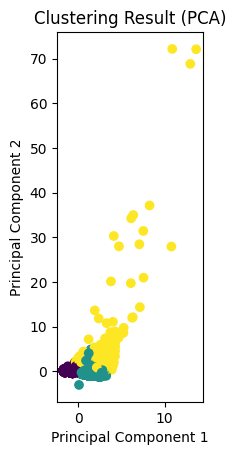

In [22]:
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Result (PCA)')

Text(0.5, 1.0, 'Clustering Based on Mass and Year')

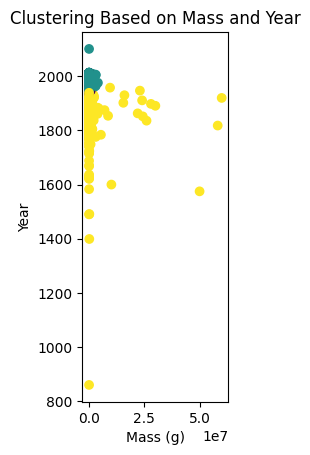

In [23]:
plt.subplot(1, 3, 2)
plt.scatter(X['mass (g)'], X['year'], c=best_labels, cmap='viridis')
plt.xlabel('Mass (g)')
plt.ylabel('Year')
plt.title('Clustering Based on Mass and Year')


Text(0.5, 1.0, 'Clustering Based on Location')

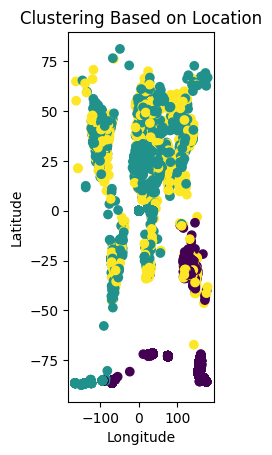

In [24]:
plt.subplot(1, 3, 3)
plt.scatter(X['reclong'], X['reclat'], c=best_labels, cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering Based on Location')


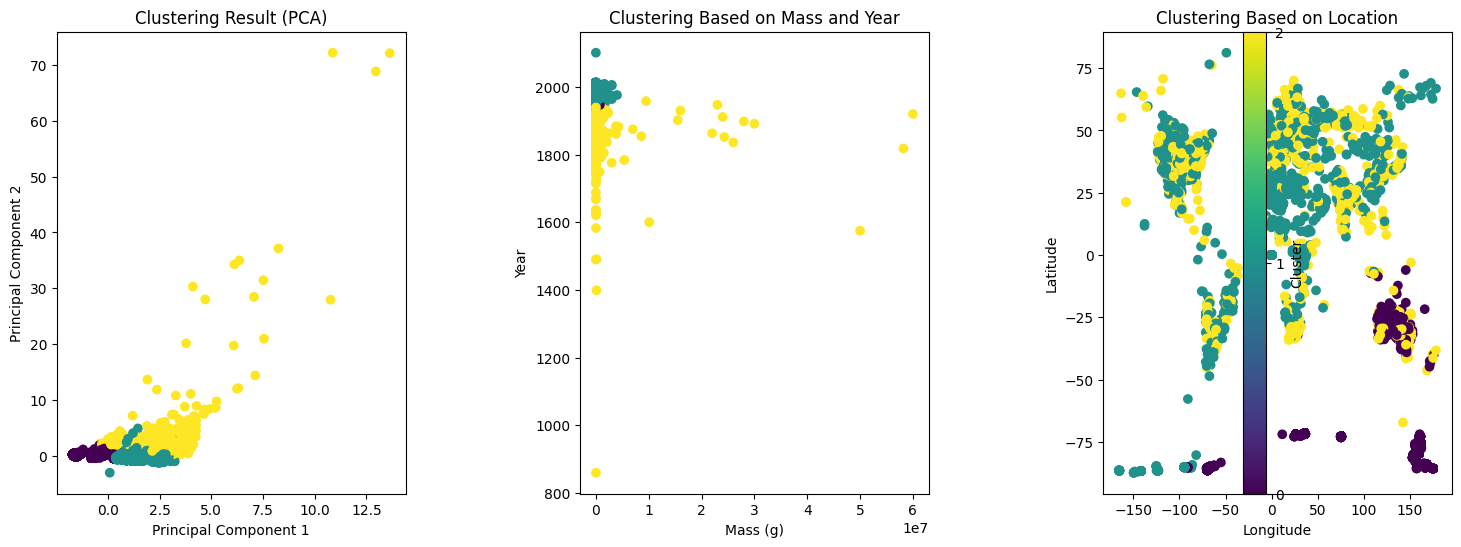

In [30]:
import matplotlib.cm as cm

# Visualize the clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot clusters based on PCA components
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap='viridis')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('Clustering Result (PCA)')

# Plot clusters based on mass and year
scatter2 = axes[1].scatter(X['mass (g)'], X['year'], c=best_labels, cmap='viridis')
axes[1].set_xlabel('Mass (g)')
axes[1].set_ylabel('Year')
axes[1].set_title('Clustering Based on Mass and Year')

# Plot clusters based on latitude and longitude
scatter3 = axes[2].scatter(X['reclong'], X['reclat'], c=best_labels, cmap='viridis')
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('Latitude')
axes[2].set_title('Clustering Based on Location')

# Create colorbar associated with mass and year scatter plot
cbar = fig.colorbar(scatter2, ax=axes, label='Cluster', orientation='vertical')
cbar.set_ticks(np.arange(best_labels.max() + 1))

plt.subplots_adjust(wspace=0.5)  # Increase horizontal space between subplots

plt.show()

In [31]:
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



## Hyperparameter Tuning for K-means

In [33]:
best_k = None
best_silhouette_score = -1

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_score_k = silhouette_score(X_scaled, kmeans.labels_)
    if silhouette_score_k > best_silhouette_score:
        best_silhouette_score = silhouette_score_k
        best_k = k

## Refit k-means with best k

In [34]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled)
best_k_labels = kmeans.labels_

In [35]:
# Calculate Davies-Bouldin index
db_index = davies_bouldin_score(X_scaled, best_k_labels)
print(f"Davies-Bouldin Index for KMeans with {best_k} clusters: {db_index}")


Davies-Bouldin Index for KMeans with 9 clusters: 0.3410874713598496


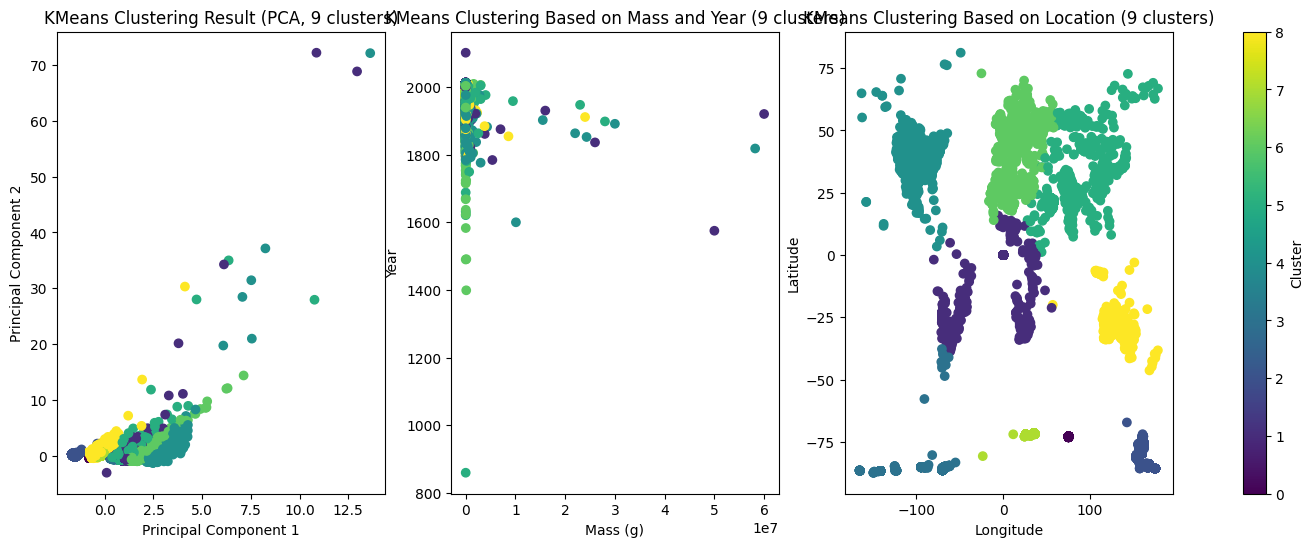

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot clusters based on PCA components
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=best_k_labels, cmap='viridis')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title(f'KMeans Clustering Result (PCA, {best_k} clusters)')

# Plot clusters based on mass and year
scatter2 = axes[1].scatter(X['mass (g)'], X['year'], c=best_k_labels, cmap='viridis')
axes[1].set_xlabel('Mass (g)')
axes[1].set_ylabel('Year')
axes[1].set_title(f'KMeans Clustering Based on Mass and Year ({best_k} clusters)')

# Plot clusters based on latitude and longitude
scatter3 = axes[2].scatter(X['reclong'], X['reclat'], c=best_k_labels, cmap='viridis')
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('Latitude')
axes[2].set_title(f'KMeans Clustering Based on Location ({best_k} clusters)')

# Create colorbar associated with mass and year scatter plot
cbar = fig.colorbar(scatter2, ax=axes, label='Cluster', orientation='vertical')
cbar.set_ticks(np.arange(best_k_labels.max() + 1))

plt.show()